In [1]:
%cd ..

/Users/christianbergen/Documents/prog/aaa21


In [2]:
import clustering
import utils


In [3]:
chicago_df = utils.read_parquet('chicago_taxi_trips_15percent_sample.parquet',
                                columns=['Trip ID','Pickup Community Area',
                                         'Trip Start Hour','Trip Kilometers'])
chicago_df.head()

,Trip ID,Pickup Community Area,Trip Start Hour,Trip Kilometers
0,3da435c5014f824c60972a99a3897b9de734d465,33.0,17,3.70
1,87986102b53baf98f56396c200342d7579744649,32.0,21,1.77
2,f6fabf24c194197e67852a193d9318a84ed30a0a,28.0,17,12.23
3,0536c5f7c1bf1fb885b5ba43a124ba0239e4cae6,32.0,12,0.16
4,0d78eba1d870afcdafce5056feaf572acacac601,8.0,9,3.06


In [4]:
chicago_df.drop(columns=['Trip ID','Pickup Community Area'], axis=1,inplace=True)


In [5]:
chicago_df['Trip Kilometers'] = chicago_df['Trip Kilometers'].astype('float')
chicago_df_q = chicago_df[(chicago_df['Trip Kilometers'] < chicago_df['Trip Kilometers'].quantile(0.95))]

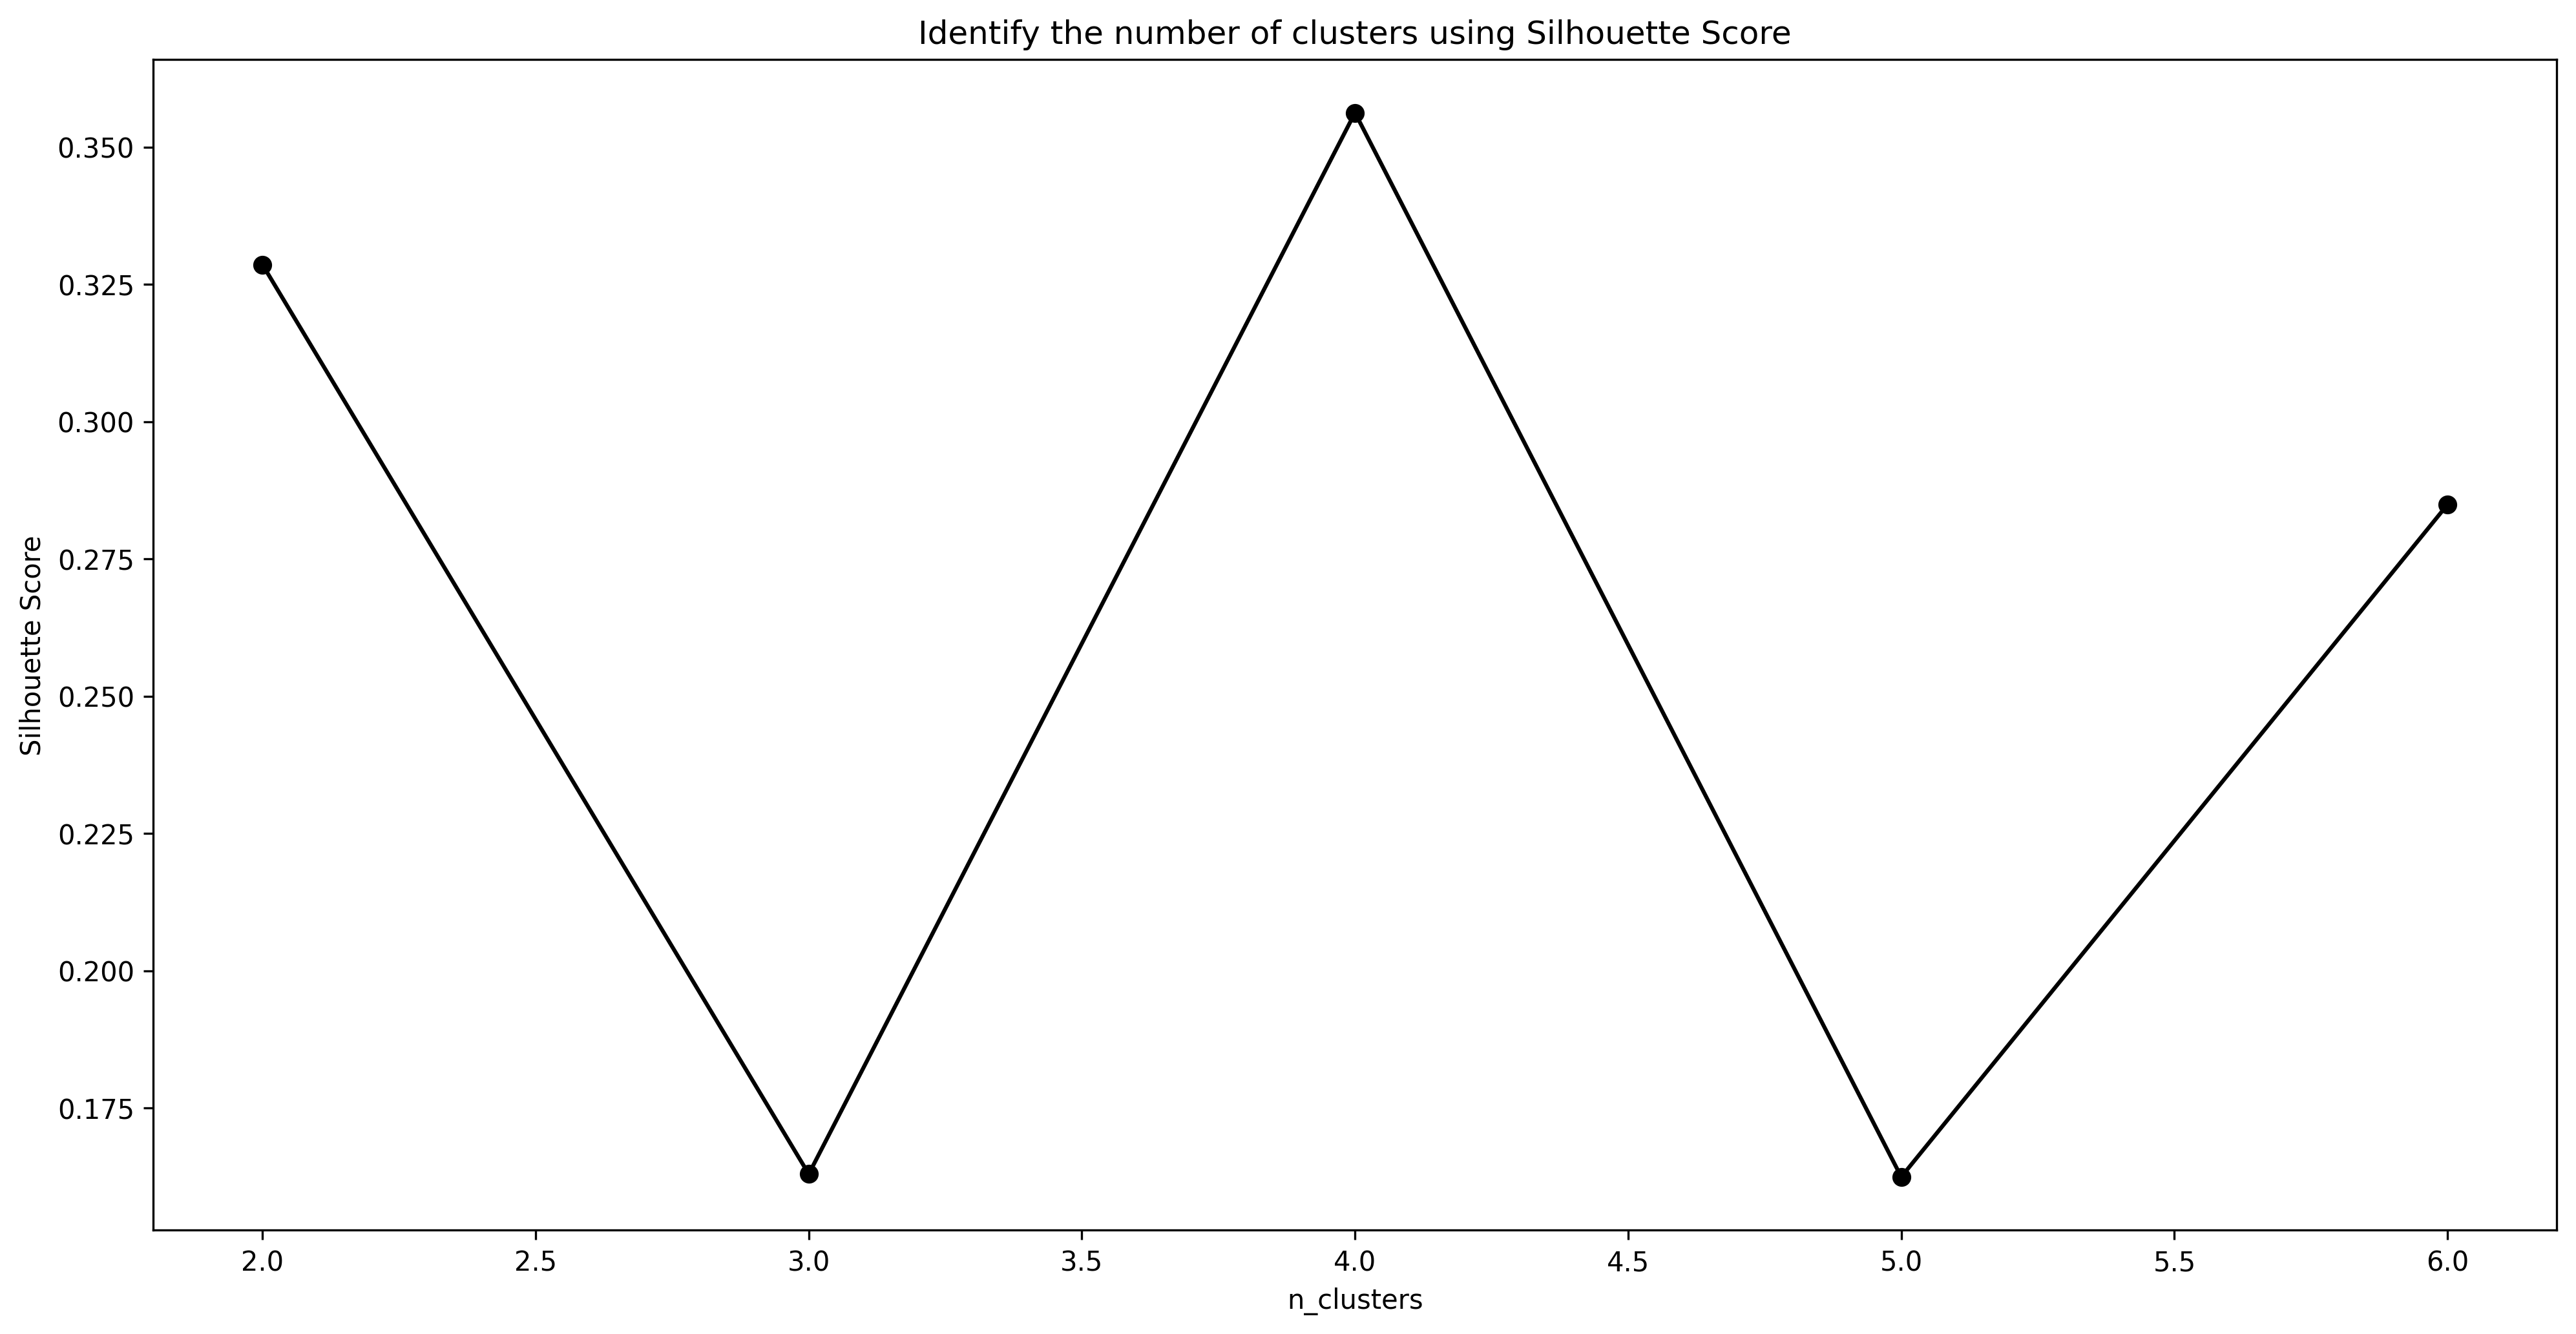

In [6]:
clustering.get_silhouette_score(chicago_df_q , "Trip Start Hour","Trip Kilometers" , 5)

(         Trip Kilometers  Trip Start Hour  cluster  cluster_0_prob  \
 0                   3.70               17        1    9.814659e-02   
 1                   1.77               21        1    2.041910e-04   
 2                  12.23               17        2    4.994268e-06   
 3                   0.16               12        5    1.081277e-01   
 4                   3.06                9        0    8.441568e-01   
 ...                  ...              ...      ...             ...   
 3295671             0.16                1        4    1.427679e-02   
 3295672            20.28               14        2    5.173860e-23   
 3295673             3.06               22        1    5.855031e-04   
 3295674             0.32               22        1    2.178786e-05   
 3295675            21.57                6        2    3.764583e-30   
 
          cluster_1_prob  cluster_2_prob  cluster_3_prob  cluster_4_prob  \
 0          5.825438e-01        0.011210    2.996263e-01    2.080286e-

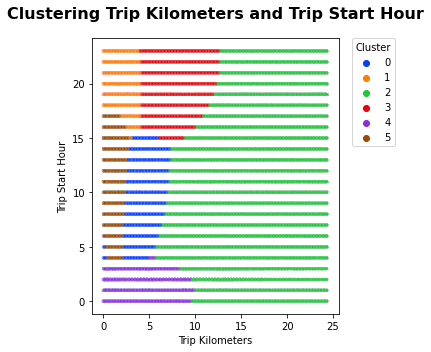

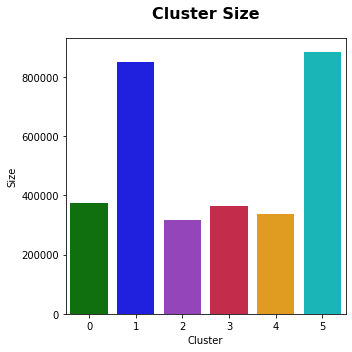

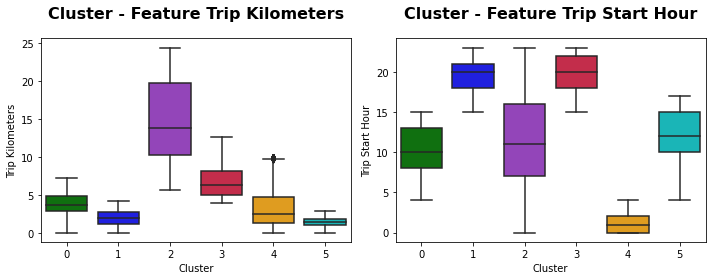

In [6]:
clustering.get_clusters_gmm(chicago_df_q,
                 column_1="Trip Start Hour",
                 column_2="Trip Kilometers",
                 title = "Clustering Trip Kilometers and Trip Start Hour",
                 xlabel="Trip Kilometers",
                 ylabel="Trip Start Hour",
                 n_cluster=6,
                 plot_sizes=True,
                 plot_boxes=True,
                 )

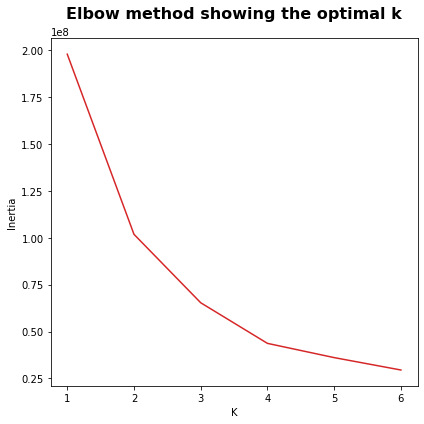

In [6]:
clustering.get_ellbow(chicago_df_q[["Trip Kilometers", "Trip Start Hour"]], 7)



(         Trip Kilometers  Trip Start Hour  cluster
 0                   3.70               17        2
 1                   1.77               21        2
 2                  12.23               17        1
 3                   0.16               12        0
 4                   3.06                9        0
 ...                  ...              ...      ...
 3295671             0.16                1        3
 3295672            20.28               14        1
 3295673             3.06               22        2
 3295674             0.32               22        2
 3295675            21.57                6        1
 
 [3130195 rows x 3 columns],
 KMeans(n_clusters=4, random_state=7))

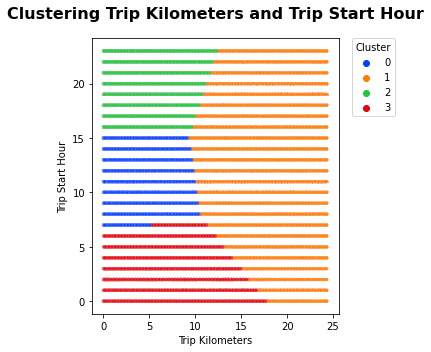

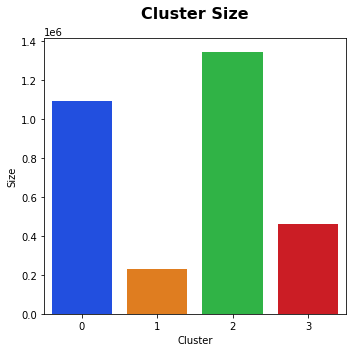

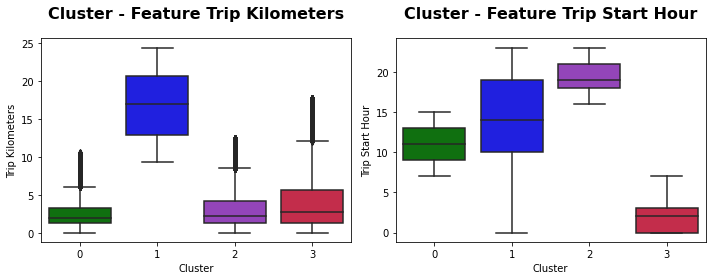

In [6]:
clustering.get_clusters_kmeans(chicago_df_q,
                 column_1="Trip Start Hour",
                 column_2="Trip Kilometers",
                 numerical_columns = ["Trip Kilometers"],
                 title = "Clustering Trip Kilometers and Trip Start Hour",
                 xlabel="Trip Kilometers",
                 ylabel="Trip Start Hour",
                 n_cluster=6,
                 plot_sizes=True,
                 plot_boxes=True,
                )
